[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  15 of 15 completed
**************Democratic********************
[['Return', 18.33236498004487, 'Volatility', 20.028294692484096, 'Sharpe Ratio', 0.9153233094240595]]
**************Republic********************
[['Return', 22.047712773040786, 'Volatility', 21.542144469308617, 'Sharpe Ratio', 1.0234688010960311]]


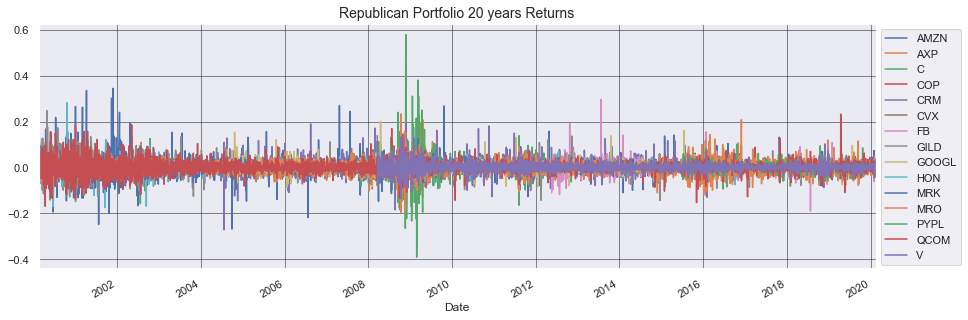

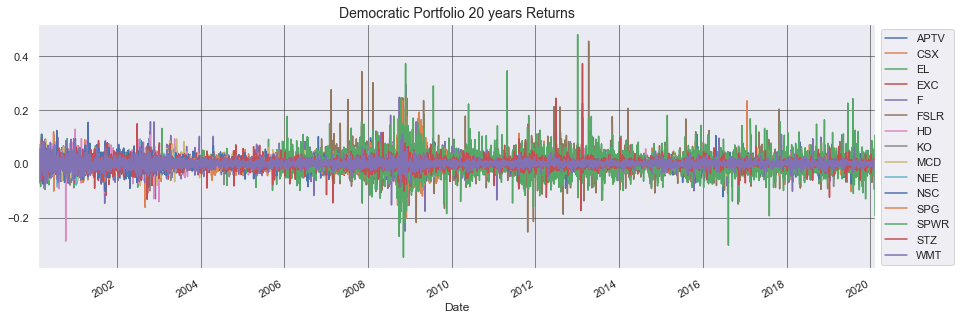

In [4]:
# -*- coding: utf-8 -*-
"""iaqf.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/139v7uEBGzkQXBYh08y4kOqYA5pdTAdei
"""

#!/usr/bin/env python
# coding: utf-8

# In[39]:
#get_ipython().system('pip install pandas_datareader==0.7.0')
# Import pandas datareader
#import pandas_datareader
#pandas_datareader.__version__
get_ipython().system('pip install quandl')
# Install the yfinance if not already installed
get_ipython().system('pip install yfinance')

# # Import the quandl
# import quandl
# # To get your API key, sign up for a free Quandl account.
# # Then, you can find your API key on Quandl account settings page.
# QUANDL_API_KEY = '9XQWgPQb26_zxsZvzuYA'
# import pandas as pd
# tickers_list = ['AMZN', 'AXP', 'C', 'FB','CVX','COP','GOOG', 'HON','MRO','MRK','PYPL','QCOM','CRM','V','GILD']
# # Import pandas
# data = pd.DataFrame(columns=tickers_list)
# # Feth the data
# for ticker in tickers_list:
#  data[ticker] = quandl.get('WIKI/' + ticker, start_date=start_date,
#  end_date=end_date, api_key=QUANDL_API_KEY)['Adj. Close']
# data.tail()
# In[74]:
# # Plot all the close prices
# data.plot(figsize=(10, 7))
# # Show the legend
# plt.legend()
# # Define the label for the title of the figure
# plt.title("Adjusted Close Price", fontsize=16)
# # Define the labels for x-axis and y-axis
# plt.ylabel('Price', fontsize=14)
# plt.xlabel('Year', fontsize=14)
# # Plot the grid lines
# plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
# plt.show()


# In[72]:

#20 yr stats
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
rep = yf.download(tickers="AMZN AXP C FB GOOGL CVX COP HON MRO MRK PYPL QCOM CRM V GILD", period="20y", interval="1d")
dem = yf.download(tickers="EXC F APTV STZ EL SPWR KO WMT HD NEE CSX MCD SPG FSLR NSC", period="20y", interval="1d")
sns.set()
rep_returns = rep['Adj Close'].pct_change()
dem_returns = dem['Adj Close'].pct_change()
weights = np.array([0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667])
rep_portfolio_return = (rep_returns['AMZN'].mean()+rep_returns['AXP'].mean()+rep_returns['C'].mean()+rep_returns['FB'].mean()+rep_returns['GOOGL'].mean()+rep_returns['CVX'].mean()+rep_returns['COP'].mean()+rep_returns['HON'].mean()+rep_returns['MRK'].mean()+rep_returns['V'].mean()+rep_returns['GILD'].mean()+rep_returns['PYPL'].mean()+rep_returns['QCOM'].mean()+rep_returns['CRM'].mean()+rep_returns['MRO'].mean())/15 
dem_portfolio_return = (dem_returns['EXC'].mean()+dem_returns['F'].mean()+dem_returns['APTV'].mean()+dem_returns['STZ'].mean()+dem_returns['EL'].mean()+dem_returns['SPWR'].mean()+dem_returns['KO'].mean()+dem_returns['WMT'].mean()+dem_returns['HD'].mean()+dem_returns['NEE'].mean()+dem_returns['CSX'].mean()+dem_returns['MCD'].mean()+dem_returns['SPG'].mean()+dem_returns['FSLR'].mean()+dem_returns['NSC'].mean())/15 
rep_annual_return = (pow(1+rep_portfolio_return,252)-1)*100
dem_annual_return = (pow(1+dem_portfolio_return,252)-1)*100
rep_cov_matrix = rep_returns.cov()
dem_cov_matrix = dem_returns.cov()
rep_portfolio_std_dev = (np.sqrt(np.dot(weights.T,np.dot(rep_cov_matrix, weights))))*np.sqrt(252)*100
dem_portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(dem_cov_matrix, weights)))*np.sqrt(252)*100
rep_sharpe = rep_annual_return/rep_portfolio_std_dev;
dem_sharpe = dem_annual_return/dem_portfolio_std_dev;
print("**************Democratic********************")
d =[["Return",dem_annual_return]+    ["Volatility",dem_portfolio_std_dev]+    ["Sharpe Ratio",dem_sharpe]]
print(d)
print("**************Republic********************")
r = [["Return",rep_annual_return]+     ["Volatility",rep_portfolio_std_dev]+     ["Sharpe Ratio",rep_sharpe]]
print(r)
rep_returns.plot(figsize=(15, 5))
plt.grid(which="major", color='k', linewidth=0.5)
plt.title("Republican Portfolio 20 years Returns", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1))
dem_returns.plot(figsize=(15, 5))
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Democratic Portfolio 20 years Returns", fontsize=14)
plt.grid(which="major", color='k', linewidth=0.5)
plt.show()



[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  15 of 15 completed
**************Democratic 2016/17********************
[['Return', 23.892269064159755, 'Volatility', 15.183742360466807, 'Sharpe Ratio', 1.5735428392388249]]
**************Republic 2016/17********************
[['Return', 24.776921557198463, 'Volatility', 13.251698208450804, 'Sharpe Ratio', 1.8697167085647826]]


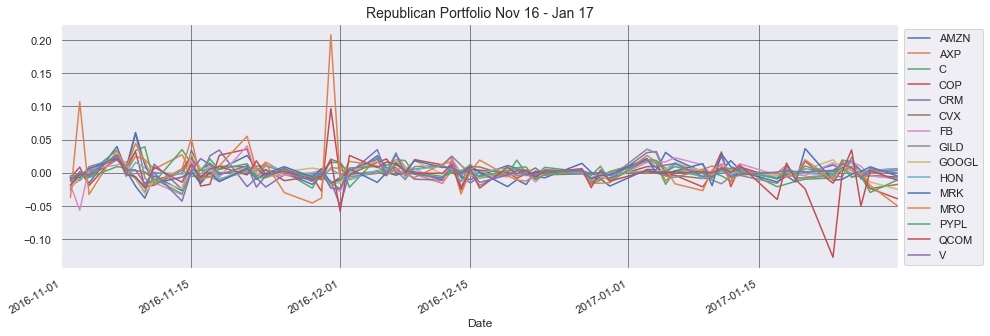

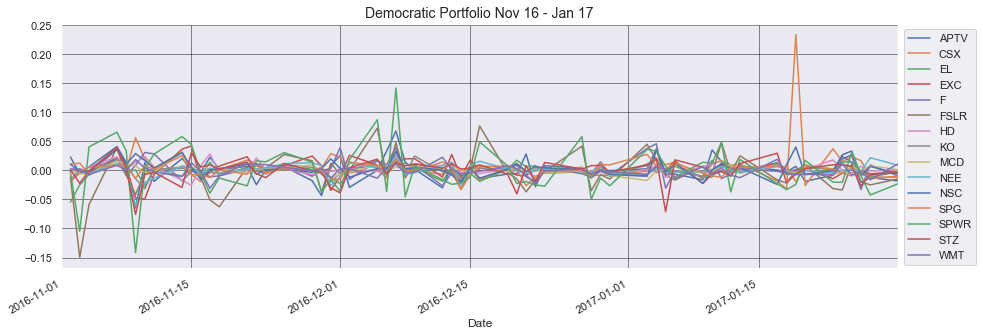

In [6]:
#Nov 2016 - Jan 2017
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
rep = yf.download(tickers="AMZN AXP C FB GOOGL CVX COP HON MRO MRK PYPL QCOM CRM V GILD", start="2016-11-01", end="2017-01-30", interval="1d")
dem = yf.download(tickers="EXC F APTV STZ EL SPWR KO WMT HD NEE CSX MCD SPG FSLR NSC", start="2016-11-01", end="2017-01-30", interval="1d")
sns.set()
rep_returns = rep['Adj Close'].pct_change()
dem_returns = dem['Adj Close'].pct_change()
weights = np.array([0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667])
rep_portfolio_return = (rep_returns['AMZN'].mean()+rep_returns['AXP'].mean()+rep_returns['C'].mean()+rep_returns['FB'].mean()+rep_returns['GOOGL'].mean()+rep_returns['CVX'].mean()+rep_returns['COP'].mean()+rep_returns['HON'].mean()+rep_returns['MRK'].mean()+rep_returns['V'].mean()+rep_returns['GILD'].mean()+rep_returns['PYPL'].mean()+rep_returns['QCOM'].mean()+rep_returns['CRM'].mean()+rep_returns['MRO'].mean())/15 
dem_portfolio_return = (dem_returns['EXC'].mean()+dem_returns['F'].mean()+dem_returns['APTV'].mean()+dem_returns['STZ'].mean()+dem_returns['EL'].mean()+dem_returns['SPWR'].mean()+dem_returns['KO'].mean()+dem_returns['WMT'].mean()+dem_returns['HD'].mean()+dem_returns['NEE'].mean()+dem_returns['CSX'].mean()+dem_returns['MCD'].mean()+dem_returns['SPG'].mean()+dem_returns['FSLR'].mean()+dem_returns['NSC'].mean())/15 
rep_annual_return = (pow(1+rep_portfolio_return,252)-1)*100
dem_annual_return = (pow(1+dem_portfolio_return,252)-1)*100
rep_cov_matrix = rep_returns.cov()
dem_cov_matrix = dem_returns.cov()
rep_portfolio_std_dev = (np.sqrt(np.dot(weights.T,np.dot(rep_cov_matrix, weights))))*np.sqrt(252)*100
dem_portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(dem_cov_matrix, weights)))*np.sqrt(252)*100
rep_sharpe = rep_annual_return/rep_portfolio_std_dev;
dem_sharpe = dem_annual_return/dem_portfolio_std_dev;
print("**************Democratic 2016/17********************")
d =[["Return",dem_annual_return]+    ["Volatility",dem_portfolio_std_dev]+    ["Sharpe Ratio",dem_sharpe]]
print(d)
print("**************Republic 2016/17********************")
r = [["Return",rep_annual_return]+     ["Volatility",rep_portfolio_std_dev]+     ["Sharpe Ratio",rep_sharpe]]
print(r)
rep_returns.plot(figsize=(15, 5))
plt.grid(which="major", color='k', linewidth=0.5)
plt.title("Republican Portfolio Nov 16 - Jan 17", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1))
dem_returns.plot(figsize=(15, 5))
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Democratic Portfolio Nov 16 - Jan 17", fontsize=14)
plt.grid(which="major", color='k', linewidth=0.5)
plt.show()



[*********************100%***********************]  14 of 14 completed
[*********************100%***********************]  15 of 15 completed
**************Democratic 2012/13********************
[['Return', 60.159828457629395, 'Volatility', 15.518553329440676, 'Sharpe Ratio', 3.8766389611522953]]
**************Republic 2012/13********************
[['Return', 63.075697282888065, 'Volatility', 13.153304384293364, 'Sharpe Ratio', 4.795425958378039]]


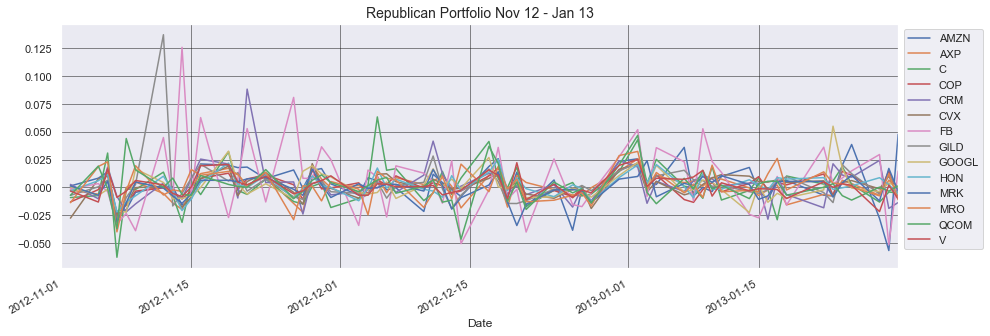

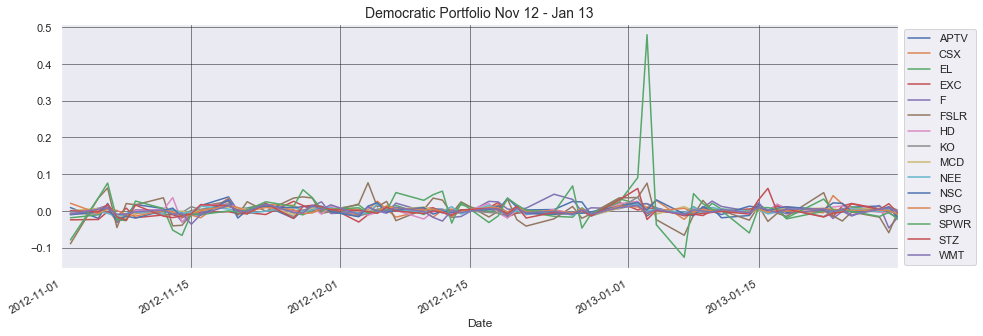

In [9]:
#Nov 2012 - Jan 2013
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
#Removed Paypal from republican
rep = yf.download(tickers="AMZN AXP C FB GOOGL CVX COP HON MRO MRK QCOM CRM V GILD", start="2012-11-01", end="2013-01-30", interval="1d")
dem = yf.download(tickers="EXC F APTV STZ EL SPWR KO WMT HD NEE CSX MCD SPG FSLR NSC", start="2012-11-01", end="2013-01-30", interval="1d")
sns.set()
rep_returns = rep['Adj Close'].pct_change()
dem_returns = dem['Adj Close'].pct_change()
weights = np.array([0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667])
weights_rep = np.array([0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667])
rep_portfolio_return = (rep_returns['AMZN'].mean()+rep_returns['AXP'].mean()+rep_returns['C'].mean()+rep_returns['FB'].mean()+rep_returns['GOOGL'].mean()+rep_returns['CVX'].mean()+rep_returns['COP'].mean()+rep_returns['HON'].mean()+rep_returns['MRK'].mean()+rep_returns['V'].mean()+rep_returns['GILD'].mean()+rep_returns['QCOM'].mean()+rep_returns['CRM'].mean()+rep_returns['MRO'].mean())/14 
dem_portfolio_return = (dem_returns['EXC'].mean()+dem_returns['F'].mean()+dem_returns['APTV'].mean()+dem_returns['STZ'].mean()+dem_returns['EL'].mean()+dem_returns['SPWR'].mean()+dem_returns['KO'].mean()+dem_returns['WMT'].mean()+dem_returns['HD'].mean()+dem_returns['NEE'].mean()+dem_returns['CSX'].mean()+dem_returns['MCD'].mean()+dem_returns['SPG'].mean()+dem_returns['FSLR'].mean()+dem_returns['NSC'].mean())/15 
rep_annual_return = (pow(1+rep_portfolio_return,252)-1)*100
dem_annual_return = (pow(1+dem_portfolio_return,252)-1)*100
rep_cov_matrix = rep_returns.cov()
dem_cov_matrix = dem_returns.cov()
rep_portfolio_std_dev = (np.sqrt(np.dot(weights_rep.T,np.dot(rep_cov_matrix, weights_rep))))*np.sqrt(252)*100
dem_portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(dem_cov_matrix, weights)))*np.sqrt(252)*100
rep_sharpe = rep_annual_return/rep_portfolio_std_dev;
dem_sharpe = dem_annual_return/dem_portfolio_std_dev;
print("**************Democratic 2012/13********************")
d =[["Return",dem_annual_return]+    ["Volatility",dem_portfolio_std_dev]+    ["Sharpe Ratio",dem_sharpe]]
print(d)
print("**************Republic 2012/13********************")
r = [["Return",rep_annual_return]+     ["Volatility",rep_portfolio_std_dev]+     ["Sharpe Ratio",rep_sharpe]]
print(r)
rep_returns.plot(figsize=(15, 5))
plt.grid(which="major", color='k', linewidth=0.5)
plt.title("Republican Portfolio Nov 12 - Jan 13", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1))
dem_returns.plot(figsize=(15, 5))
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Democratic Portfolio Nov 12 - Jan 13", fontsize=14)
plt.grid(which="major", color='k', linewidth=0.5)
plt.show()



[*********************100%***********************]  13 of 13 completed
[*********************100%***********************]  14 of 14 completed
**************Democratic 2008/09********************
[['Return', -17.319936591880126, 'Volatility', 57.87484781435824, 'Sharpe Ratio', -0.2992653500780904]]
**************Republic 2008/09********************
[['Return', -24.17981104873438, 'Volatility', 58.69551679950781, 'Sharpe Ratio', -0.41195328650615337]]


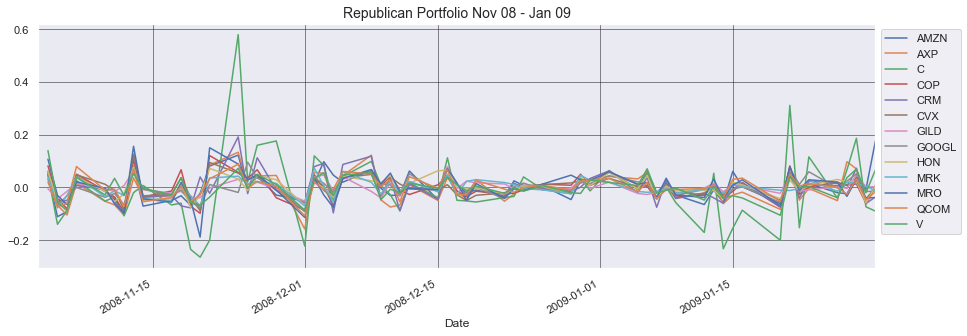

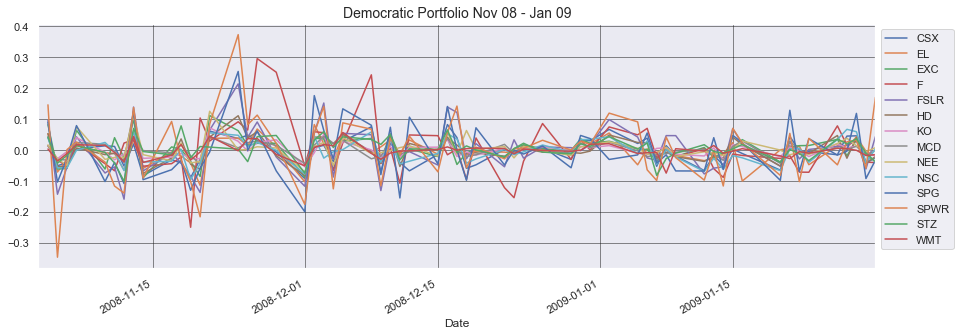

[*********************100%***********************]  12 of 12 completed
[*********************100%***********************]  12 of 12 completed
**************Democratic 2004/05********************
[['Return', 32.2248239597259, 'Volatility', 8.671538024158936, 'Sharpe Ratio', 3.7161601402135847]]
**************Republic 2004/05********************
[['Return', -4.014261017752274, 'Volatility', 10.283936558035906, 'Sharpe Ratio', -0.39034284148860443]]


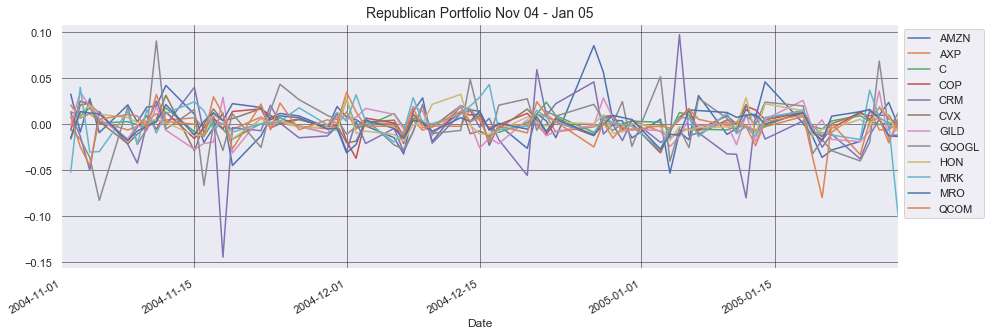

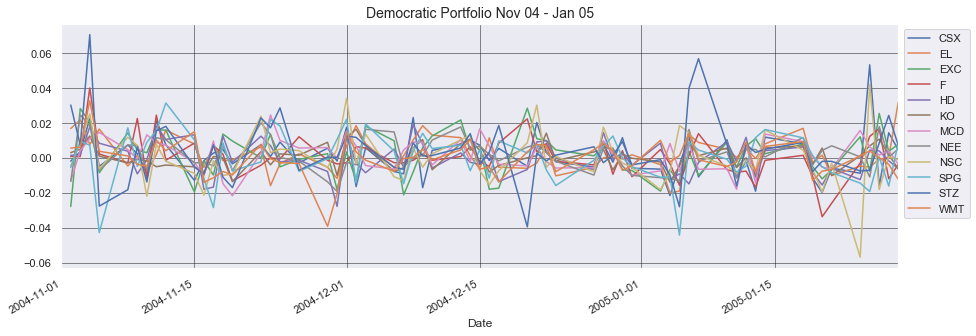

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  12 of 12 completed
**************Democratic 2000/01********************
[['Return', 38.81300564796921, 'Volatility', 12.785404982028734, 'Sharpe Ratio', 3.0357275113713706]]
**************Republic 2000/01********************
[['Return', -17.84267146587749, 'Volatility', 21.61848245142001, 'Sharpe Ratio', -0.8253433841146187]]


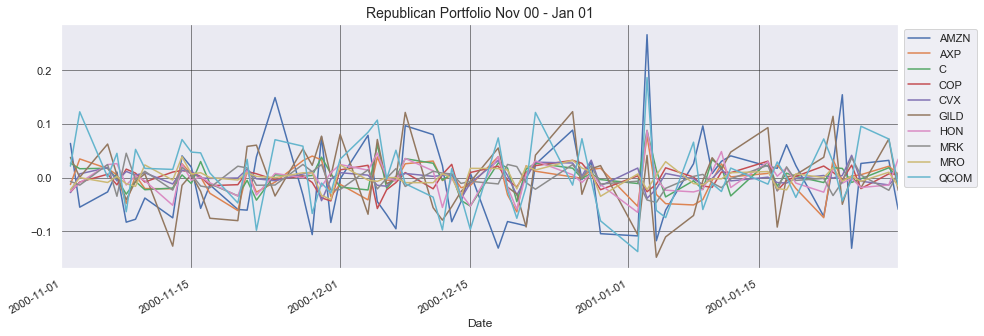

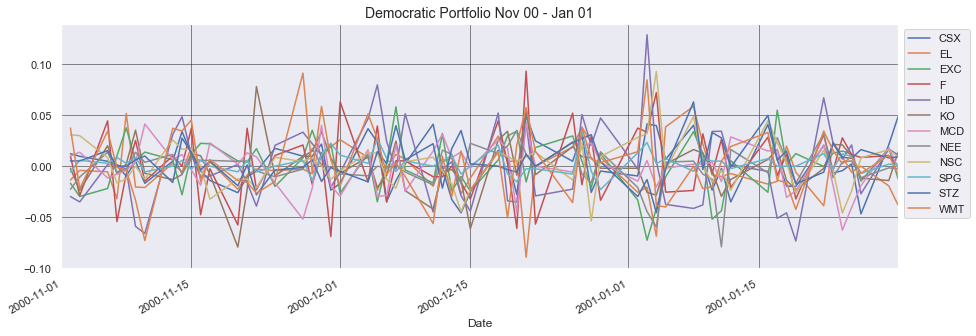

In [8]:
#Nov 2008 - Jan 2009
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
rep = yf.download(tickers="AMZN AXP C GOOGL CVX COP HON MRO MRK QCOM CRM V GILD", start="2008-11-01", end="2009-01-30", interval="1d")
dem = yf.download(tickers="EXC F STZ EL SPWR KO WMT HD NEE CSX MCD SPG FSLR NSC", start="2008-11-01", end="2009-01-30", interval="1d")
sns.set()
#removed FB & PYPL from republic, APTV from dem
rep_returns = rep['Adj Close'].pct_change()
dem_returns = dem['Adj Close'].pct_change()
weights_rep = np.array([0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667])
weights_dem = np.array([0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667])
rep_portfolio_return = (rep_returns['AMZN'].mean()+rep_returns['AXP'].mean()+rep_returns['C'].mean()+rep_returns['GOOGL'].mean()+rep_returns['CVX'].mean()+rep_returns['COP'].mean()+rep_returns['HON'].mean()+rep_returns['MRK'].mean()+rep_returns['V'].mean()+rep_returns['GILD'].mean()+rep_returns['QCOM'].mean()+rep_returns['CRM'].mean()+rep_returns['MRO'].mean())/13 
dem_portfolio_return = (dem_returns['EXC'].mean()+dem_returns['F'].mean()+dem_returns['STZ'].mean()+dem_returns['EL'].mean()+dem_returns['SPWR'].mean()+dem_returns['KO'].mean()+dem_returns['WMT'].mean()+dem_returns['HD'].mean()+dem_returns['NEE'].mean()+dem_returns['CSX'].mean()+dem_returns['MCD'].mean()+dem_returns['SPG'].mean()+dem_returns['FSLR'].mean()+dem_returns['NSC'].mean())/14 
rep_annual_return = (pow(1+rep_portfolio_return,252)-1)*100
dem_annual_return = (pow(1+dem_portfolio_return,252)-1)*100
rep_cov_matrix = rep_returns.cov()
dem_cov_matrix = dem_returns.cov()
rep_portfolio_std_dev = (np.sqrt(np.dot(weights_rep.T,np.dot(rep_cov_matrix, weights_rep))))*np.sqrt(252)*100
dem_portfolio_std_dev = np.sqrt(np.dot(weights_dem.T,np.dot(dem_cov_matrix, weights_dem)))*np.sqrt(252)*100
rep_sharpe = rep_annual_return/rep_portfolio_std_dev;
dem_sharpe = dem_annual_return/dem_portfolio_std_dev;
print("**************Democratic 2008/09********************")
d =[["Return",dem_annual_return]+    ["Volatility",dem_portfolio_std_dev]+    ["Sharpe Ratio",dem_sharpe]]
print(d)
print("**************Republic 2008/09********************")
r = [["Return",rep_annual_return]+     ["Volatility",rep_portfolio_std_dev]+     ["Sharpe Ratio",rep_sharpe]]
print(r)
rep_returns.plot(figsize=(15, 5))
plt.grid(which="major", color='k', linewidth=0.5)
plt.title("Republican Portfolio Nov 08 - Jan 09", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1))
dem_returns.plot(figsize=(15, 5))
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Democratic Portfolio Nov 08 - Jan 09", fontsize=14)
plt.grid(which="major", color='k', linewidth=0.5)
plt.show()

#Nov 2004 - Jan 2005
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
rep = yf.download(tickers="AMZN AXP C GOOGL CVX COP HON MRO MRK QCOM CRM GILD", start="2004-11-01", end="2005-01-30", interval="1d")
dem = yf.download(tickers="EXC F STZ EL KO WMT HD NEE CSX MCD SPG NSC", start="2004-11-01", end="2005-01-30", interval="1d")
sns.set()
#removed FB/PYPL/V from republic, APTV/FSLR/SPWR from dem
rep_returns = rep['Adj Close'].pct_change()
dem_returns = dem['Adj Close'].pct_change()
weights_rep = np.array([0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667])
weights_dem = np.array([0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667])
rep_portfolio_return = (rep_returns['AMZN'].mean()+rep_returns['AXP'].mean()+rep_returns['C'].mean()+rep_returns['GOOGL'].mean()+rep_returns['CVX'].mean()+rep_returns['COP'].mean()+rep_returns['HON'].mean()+rep_returns['MRK'].mean()+rep_returns['GILD'].mean()+rep_returns['QCOM'].mean()+rep_returns['CRM'].mean()+rep_returns['MRO'].mean())/12 
dem_portfolio_return = (dem_returns['EXC'].mean()+dem_returns['F'].mean()+dem_returns['STZ'].mean()+dem_returns['EL'].mean()+dem_returns['KO'].mean()+dem_returns['WMT'].mean()+dem_returns['HD'].mean()+dem_returns['NEE'].mean()+dem_returns['CSX'].mean()+dem_returns['MCD'].mean()+dem_returns['SPG'].mean()+dem_returns['NSC'].mean())/12 
rep_annual_return = (pow(1+rep_portfolio_return,252)-1)*100
dem_annual_return = (pow(1+dem_portfolio_return,252)-1)*100
rep_cov_matrix = rep_returns.cov()
dem_cov_matrix = dem_returns.cov()
rep_portfolio_std_dev = (np.sqrt(np.dot(weights_rep.T,np.dot(rep_cov_matrix, weights_rep))))*np.sqrt(252)*100
dem_portfolio_std_dev = np.sqrt(np.dot(weights_dem.T,np.dot(dem_cov_matrix, weights_dem)))*np.sqrt(252)*100
rep_sharpe = rep_annual_return/rep_portfolio_std_dev;
dem_sharpe = dem_annual_return/dem_portfolio_std_dev;
print("**************Democratic 2004/05********************")
d =[["Return",dem_annual_return]+    ["Volatility",dem_portfolio_std_dev]+    ["Sharpe Ratio",dem_sharpe]]
print(d)
print("**************Republic 2004/05********************")
r = [["Return",rep_annual_return]+     ["Volatility",rep_portfolio_std_dev]+     ["Sharpe Ratio",rep_sharpe]]
print(r)
rep_returns.plot(figsize=(15, 5))
plt.grid(which="major", color='k', linewidth=0.5)
plt.title("Republican Portfolio Nov 04 - Jan 05", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1))
dem_returns.plot(figsize=(15, 5))
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Democratic Portfolio Nov 04 - Jan 05", fontsize=14)
plt.grid(which="major", color='k', linewidth=0.5)
plt.show()

#Nov 2000 - Jan 2001
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
rep = yf.download(tickers="AMZN AXP C CVX COP HON MRO MRK QCOM GILD", start="2000-11-01", end="2001-01-30", interval="1d")
dem = yf.download(tickers="EXC F STZ EL KO WMT HD NEE CSX MCD SPG NSC", start="2000-11-01", end="2001-01-30", interval="1d")
sns.set()
#removed FB/PYPL/V/CRM/GOOGL from republic, APTV/FSLR/SPWR from dem
rep_returns = rep['Adj Close'].pct_change()
dem_returns = dem['Adj Close'].pct_change()
weights_rep = np.array([0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667])
weights_dem = np.array([0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667,0.0667])
rep_portfolio_return = (rep_returns['AMZN'].mean()+rep_returns['AXP'].mean()+rep_returns['C'].mean()+rep_returns['CVX'].mean()+rep_returns['COP'].mean()+rep_returns['HON'].mean()+rep_returns['MRK'].mean()+rep_returns['GILD'].mean()+rep_returns['QCOM'].mean()+rep_returns['MRO'].mean())/10 
dem_portfolio_return = (dem_returns['EXC'].mean()+dem_returns['F'].mean()+dem_returns['STZ'].mean()+dem_returns['EL'].mean()+dem_returns['KO'].mean()+dem_returns['WMT'].mean()+dem_returns['HD'].mean()+dem_returns['NEE'].mean()+dem_returns['CSX'].mean()+dem_returns['MCD'].mean()+dem_returns['SPG'].mean()+dem_returns['NSC'].mean())/12 
rep_annual_return = (pow(1+rep_portfolio_return,252)-1)*100
dem_annual_return = (pow(1+dem_portfolio_return,252)-1)*100
rep_cov_matrix = rep_returns.cov()
dem_cov_matrix = dem_returns.cov()
rep_portfolio_std_dev = (np.sqrt(np.dot(weights_rep.T,np.dot(rep_cov_matrix, weights_rep))))*np.sqrt(252)*100
dem_portfolio_std_dev = np.sqrt(np.dot(weights_dem.T,np.dot(dem_cov_matrix, weights_dem)))*np.sqrt(252)*100
rep_sharpe = rep_annual_return/rep_portfolio_std_dev;
dem_sharpe = dem_annual_return/dem_portfolio_std_dev;
print("**************Democratic 2000/01********************")
d =[["Return",dem_annual_return]+    ["Volatility",dem_portfolio_std_dev]+    ["Sharpe Ratio",dem_sharpe]]
print(d)
print("**************Republic 2000/01********************")
r = [["Return",rep_annual_return]+     ["Volatility",rep_portfolio_std_dev]+     ["Sharpe Ratio",rep_sharpe]]
print(r)
rep_returns.plot(figsize=(15, 5))
plt.grid(which="major", color='k', linewidth=0.5)
plt.title("Republican Portfolio Nov 00 - Jan 01", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1))
dem_returns.plot(figsize=(15, 5))
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Democratic Portfolio Nov 00 - Jan 01", fontsize=14)
plt.grid(which="major", color='k', linewidth=0.5)
plt.show()

